### 📏 Pixel to Centimeter Conversion Guide

Converting **pixels (px)** to **centimeters (cm)** is a straightforward process using a conversion factor based on screen DPI (Dots Per Inch).

---

#### 🧩 Step-by-Step Guide

1. **Determine DPI (Dots Per Inch):**  
   Identify the DPI of your display or image.  
   The standard value for most screens is **96 DPI**.

2. **Use the Conversion Formula:**

   $$
   \text{cm} = \frac{\text{px}}{\text{DPI}} \times 2.54
   $$

   Where:
   - **px** = Number of pixels  
   - **DPI** = Dots per inch  
   - **2.54** = Centimeters per inch  

---

#### 🧮 Example Calculation

For an image that is **1920 pixels wide** on a **96 DPI** screen:

$$
\text{cm} = \frac{1920}{96} \times 2.54 = 50.8 \, \text{cm}
$$

So, a 1920px wide image corresponds to approximately **50.8 cm**.

---

#### 💡 Notes
- This conversion assumes a **fixed DPI**, which may differ between devices and images.  
- For more accurate real-world size detection (e.g., object measurement in computer vision), calibration with a **known reference object** is recommended.


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

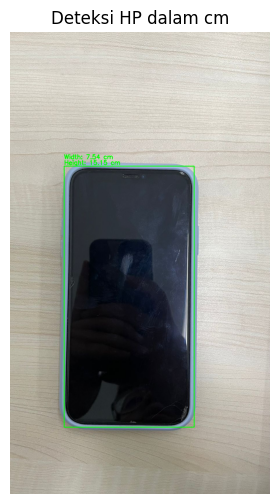

Lebar HP terdeteksi: 7.54 cm
Tinggi HP terdeteksi: 15.15 cm
Rasio konversi: 0.0168 cm/pixel


In [7]:
# Fungsi untuk menampilkan gambar
def display_image(img, title='Result'):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Membaca gambar HP
img = cv2.imread('assets/Image6.jpg')

# Ubah ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian blur untuk mengurangi noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Sobel edge detection
sobel_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# Threshold agar lebih kontras
_, thresh = cv2.threshold(sobel_combined, 50, 255, cv2.THRESH_BINARY)

# Cari kontur
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Pastikan kontur ditemukan
if not contours:
    raise ValueError("Tidak ditemukan kontur pada citra HP.")

# Cari kontur terbesar (HP)
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Ukuran sebenarnya (cm)
actual_width_cm = 7.57
actual_height_cm = 15.09

# Hitung rasio cm/pixel
cm_per_pixel_w = actual_width_cm / w
cm_per_pixel_h = actual_height_cm / h
cm_per_pixel_avg = (cm_per_pixel_w + cm_per_pixel_h) / 2

# Konversi ukuran terdeteksi ke cm
detected_width_cm = w * cm_per_pixel_avg
detected_height_cm = h * cm_per_pixel_avg

# Gambar bounding box dan ukuran dalam cm
img_box = img.copy()
cv2.rectangle(img_box, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.putText(img_box, f"Width: {detected_width_cm:.2f} cm", (x, y - 25),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.putText(img_box, f"Height: {detected_height_cm:.2f} cm", (x, y - 5),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Tampilkan hasil
display_image(img_box, 'Deteksi HP dalam cm')

# Cetak hasil akhir dalam cm
print(f"Lebar HP terdeteksi: {detected_width_cm:.2f} cm")
print(f"Tinggi HP terdeteksi: {detected_height_cm:.2f} cm")
print(f"Rasio konversi: {cm_per_pixel_avg:.4f} cm/pixel")